<a href="https://colab.research.google.com/github/armandoordonez/ClusteringMixedData/blob/main/Te_damos_la_bienvenida_a_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn kmodes scipy

Dataset de ejemplo generado:
         income  age     spending  credit_score    education  job_sector  \
0  57450.712295   26  1244.055165           583          PhD  Technology   
1  47926.035482   79   630.740705           735  High School  Technology   
2  59715.328072   54  1068.237980           570     Bachelor  Technology   
3  72845.447846   50  1392.142826           638     Bachelor       Other   
4  46487.699379   68   517.755030           700          PhD     Finance   

  marital_status region  has_car  owns_home  
0         Single   West        1          1  
1        Widowed  South        0          0  
2       Divorced  South        0          1  
3       Divorced  South        1          1  
4       Divorced  North        1          1  

ITERACIÓN 1: Variables seleccionadas: ['income', 'age', 'spending', 'credit_score']
Tipos de variables: 4 numéricas, 0 categóricas
Algoritmo seleccionado: KMEANS


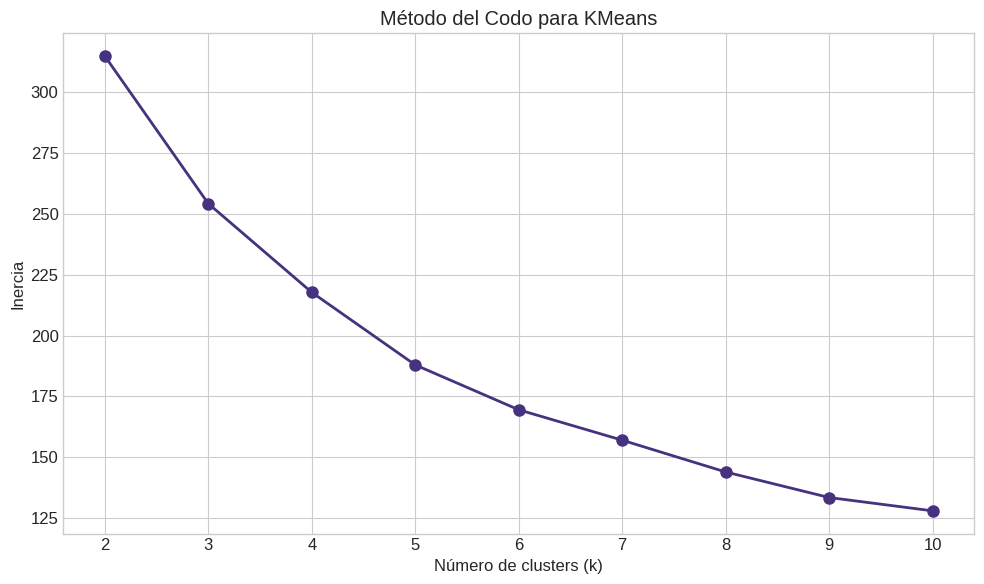


Métricas de evaluación:
Silhouette Score: 0.22310526784632212
Calinski-Harabasz Index: 27.83233378829047
Davies-Bouldin Index: 1.4662016887413405

Distribución de registros por cluster:
cluster
0    34
1    36
2    30
Name: count, dtype: int64

Estadísticas por cluster:
               income        age     spending  credit_score
cluster                                                    
0        49520.868680  66.235294   863.453925    717.735294
1        36568.108323  38.361111  1007.573893    623.555556
2        61468.959639  44.466667  1251.457935    622.266667


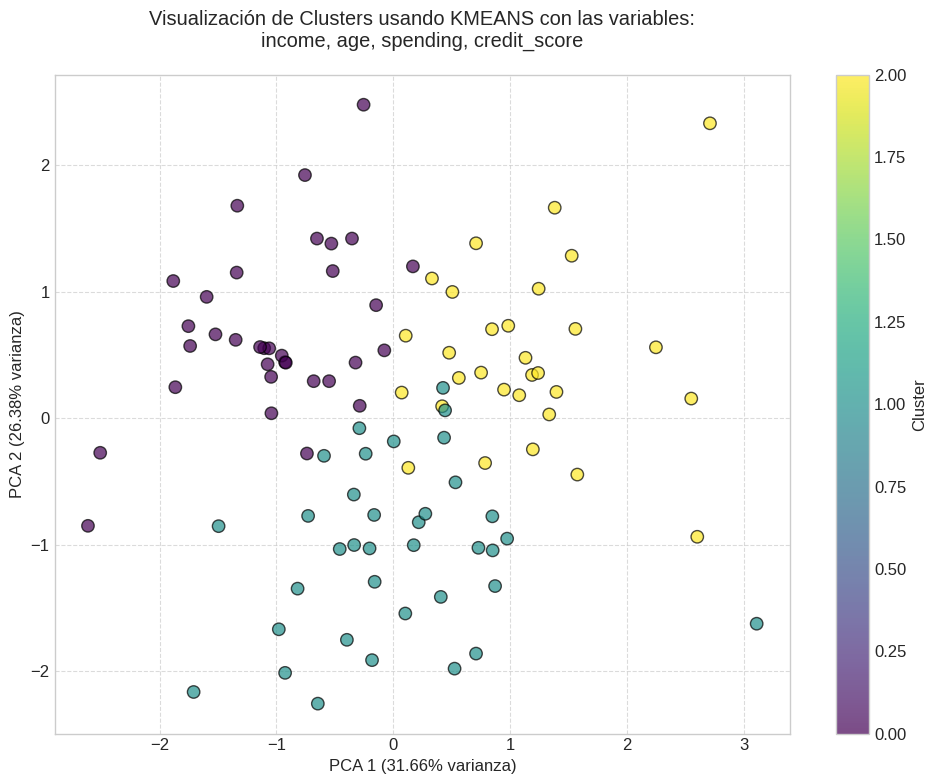

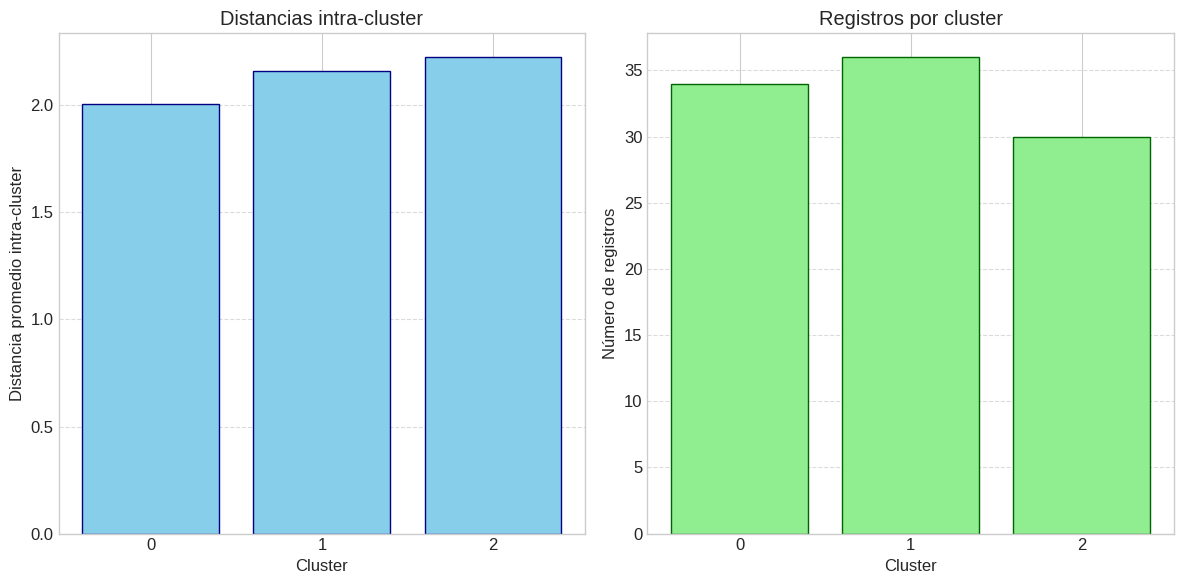

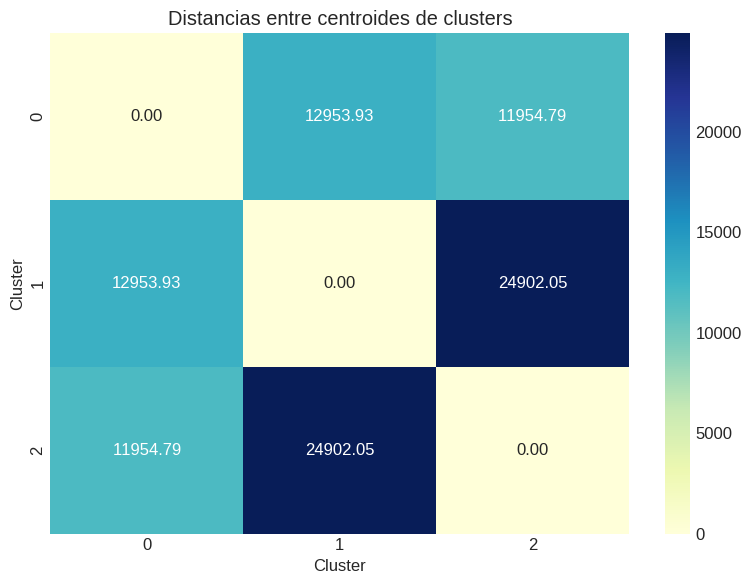


ITERACIÓN 2: Variables seleccionadas: ['spending', 'credit_score', 'education', 'job_sector']
Tipos de variables: 2 numéricas, 2 categóricas
Algoritmo seleccionado: KPROTOTYPES


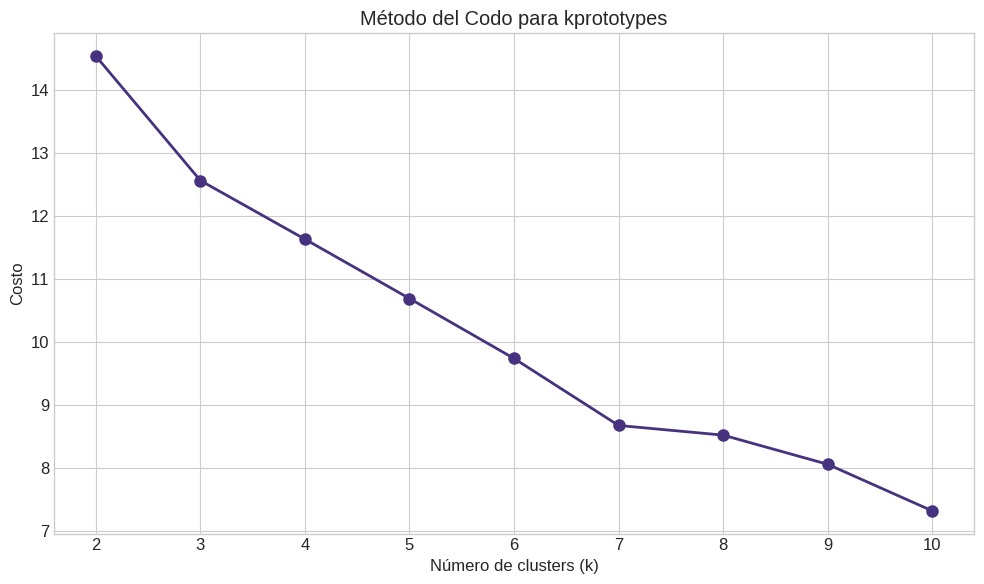


Métricas de evaluación:
Silhouette Score: 0.1212133142060173
Calinski-Harabasz Index: 16.59798177091955
Davies-Bouldin Index: 2.046623402515797

Distribución de registros por cluster:
cluster
0    34
1    31
2    35
Name: count, dtype: int64

Estadísticas por cluster:
            spending  credit_score    education  job_sector
cluster                                                    
0        1032.723319    582.264706     Bachelor  Technology
1        1238.175352    655.741935          PhD       Other
2         847.937226    725.542857  High School     Finance


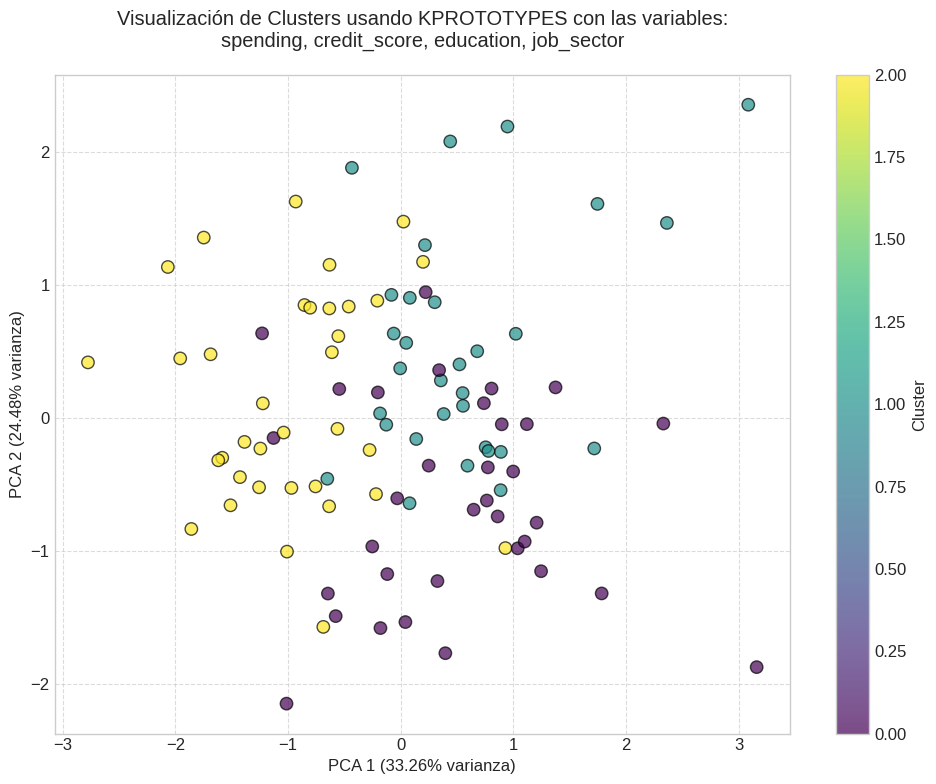

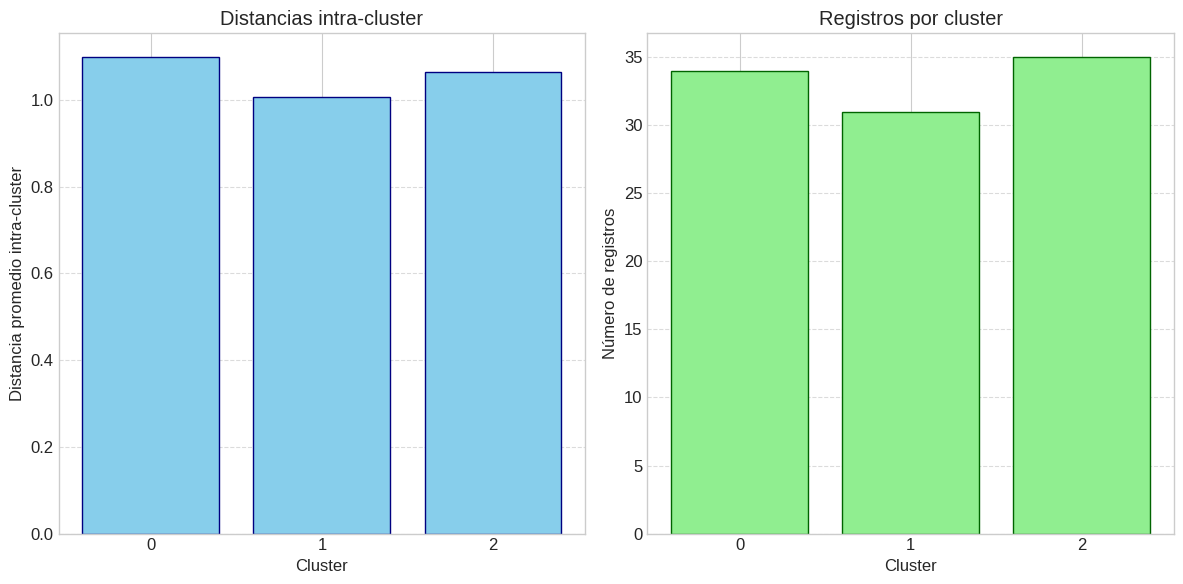

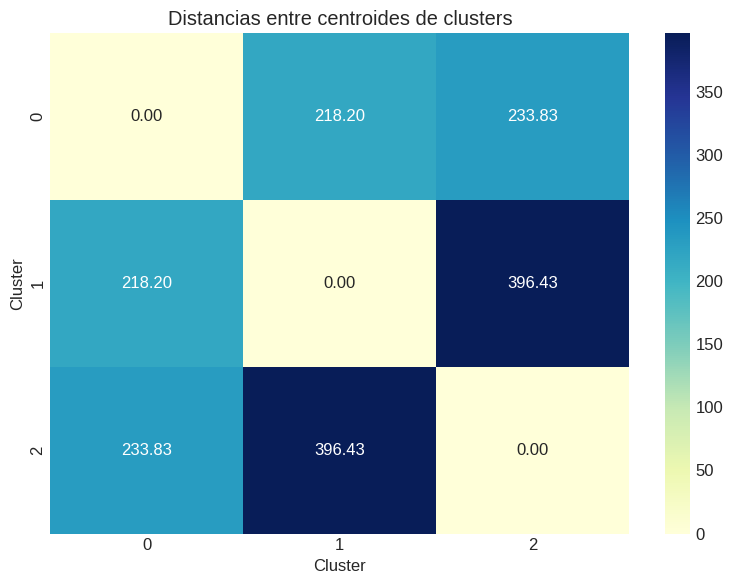


ITERACIÓN 3: Variables seleccionadas: ['education', 'job_sector', 'income', 'age']
Tipos de variables: 2 numéricas, 2 categóricas
Algoritmo seleccionado: KPROTOTYPES


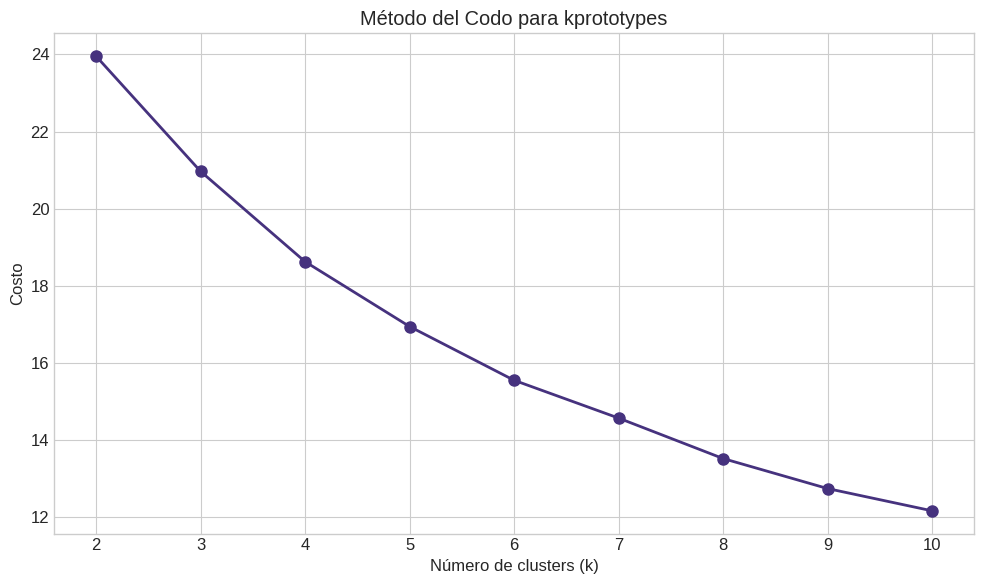


Métricas de evaluación:
Silhouette Score: 0.11142919583464535
Calinski-Harabasz Index: 16.91182484392663
Davies-Bouldin Index: 2.515882247868738

Distribución de registros por cluster:
cluster
0    37
1    34
2    29
Name: count, dtype: int64

Estadísticas por cluster:
               income        age    education  job_sector
cluster                                                  
0        51081.135848  67.972973  High School  Technology
1        47451.869620  28.470588  High School       Other
2        46236.711395  51.172414     Bachelor  Healthcare


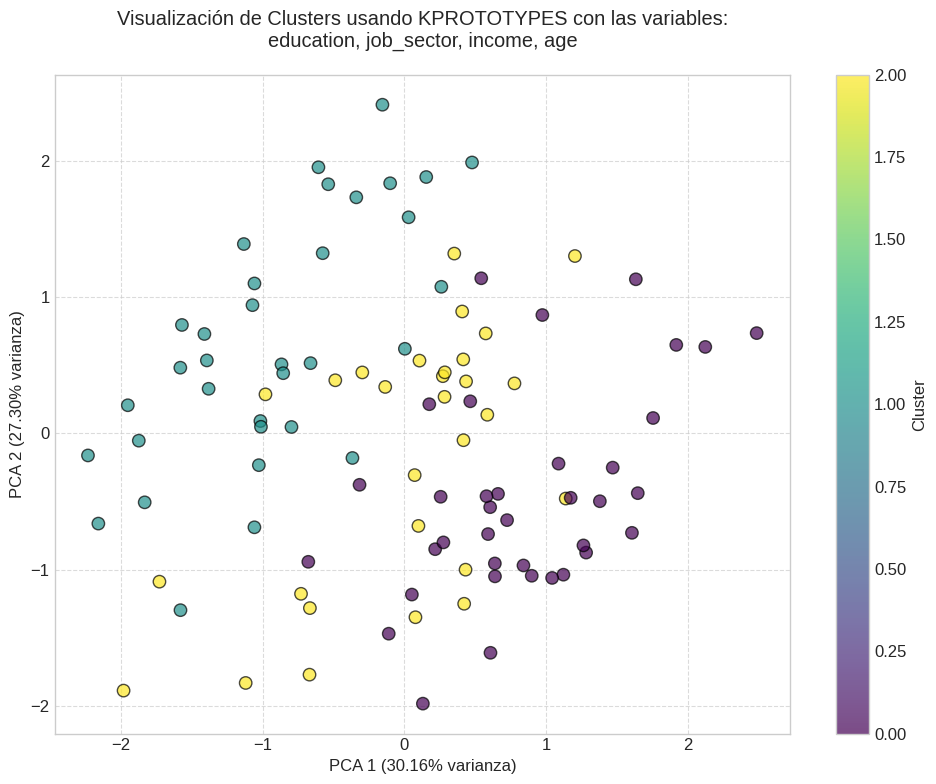

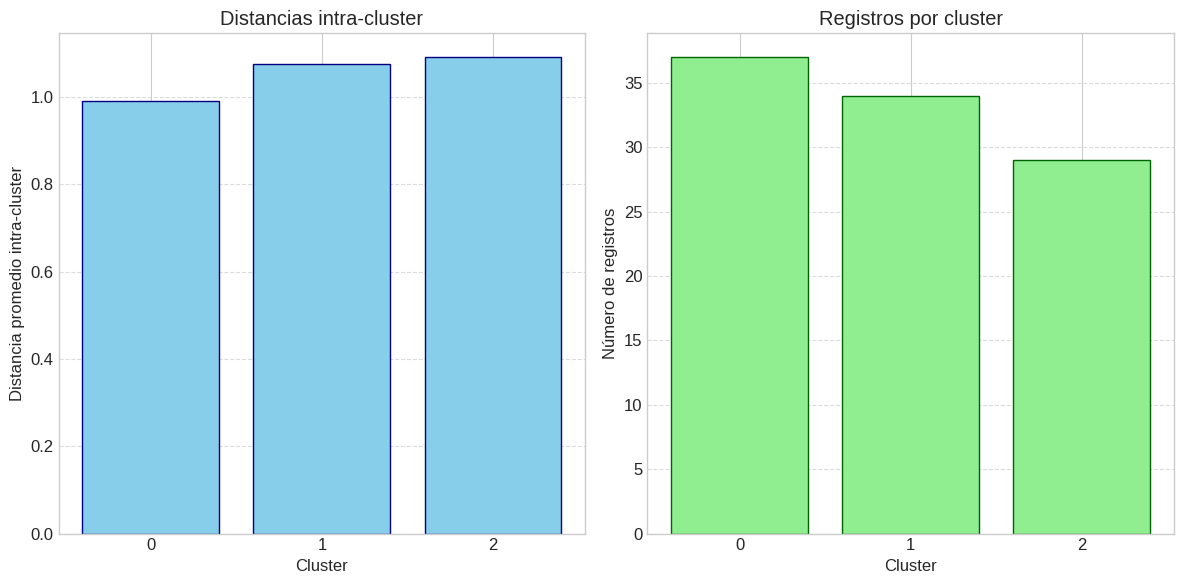

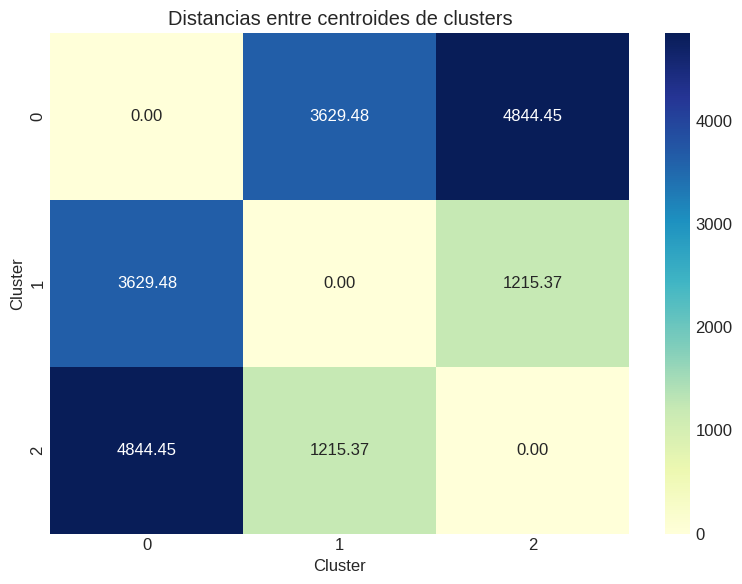


ITERACIÓN 4: Variables seleccionadas: ['income', 'age', 'spending', 'credit_score']
Tipos de variables: 4 numéricas, 0 categóricas
Algoritmo seleccionado: KMEANS


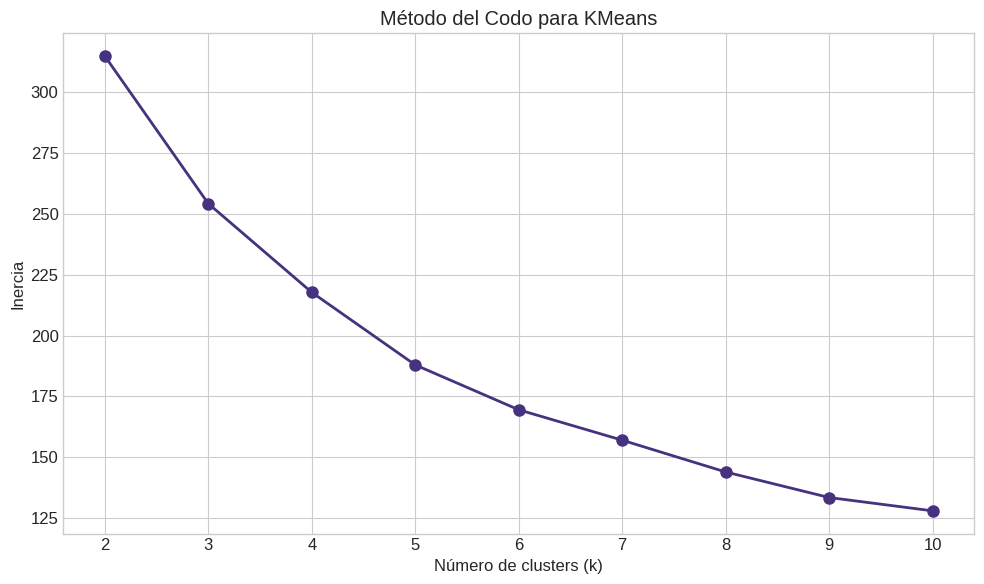


Métricas de evaluación:
Silhouette Score: 0.22310526784632212
Calinski-Harabasz Index: 27.83233378829047
Davies-Bouldin Index: 1.4662016887413405

Distribución de registros por cluster:
cluster
0    34
1    36
2    30
Name: count, dtype: int64

Estadísticas por cluster:
               income        age     spending  credit_score
cluster                                                    
0        49520.868680  66.235294   863.453925    717.735294
1        36568.108323  38.361111  1007.573893    623.555556
2        61468.959639  44.466667  1251.457935    622.266667


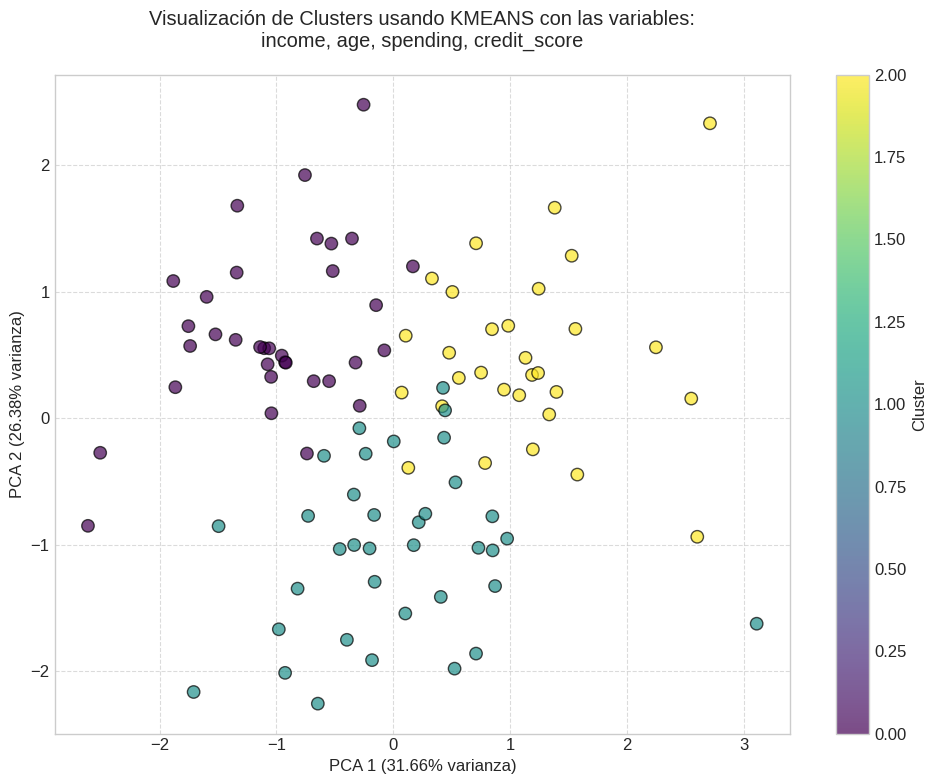

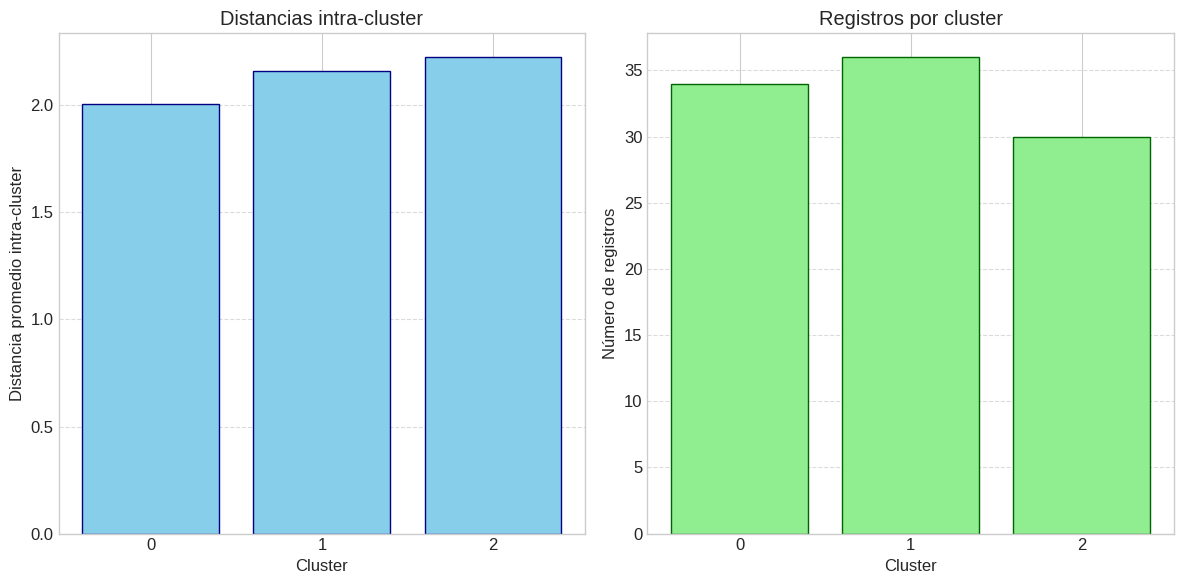

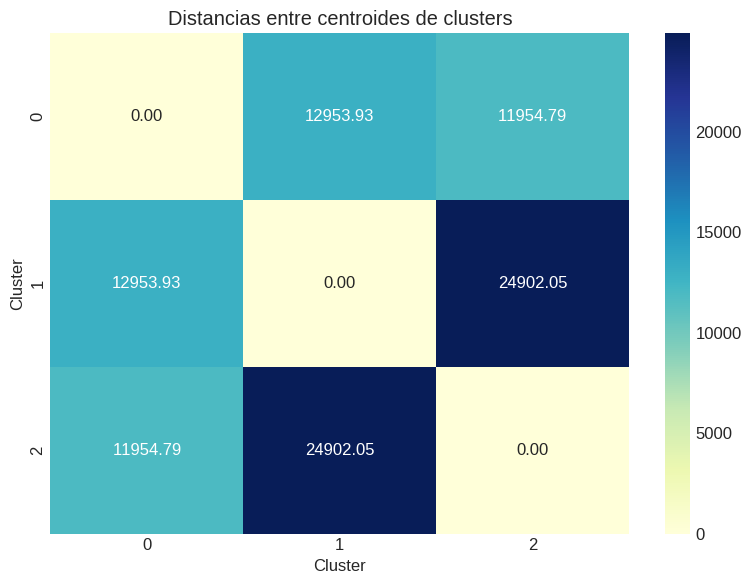


ITERACIÓN 5: Variables seleccionadas: ['spending', 'credit_score', 'education', 'job_sector']
Tipos de variables: 2 numéricas, 2 categóricas
Algoritmo seleccionado: KPROTOTYPES


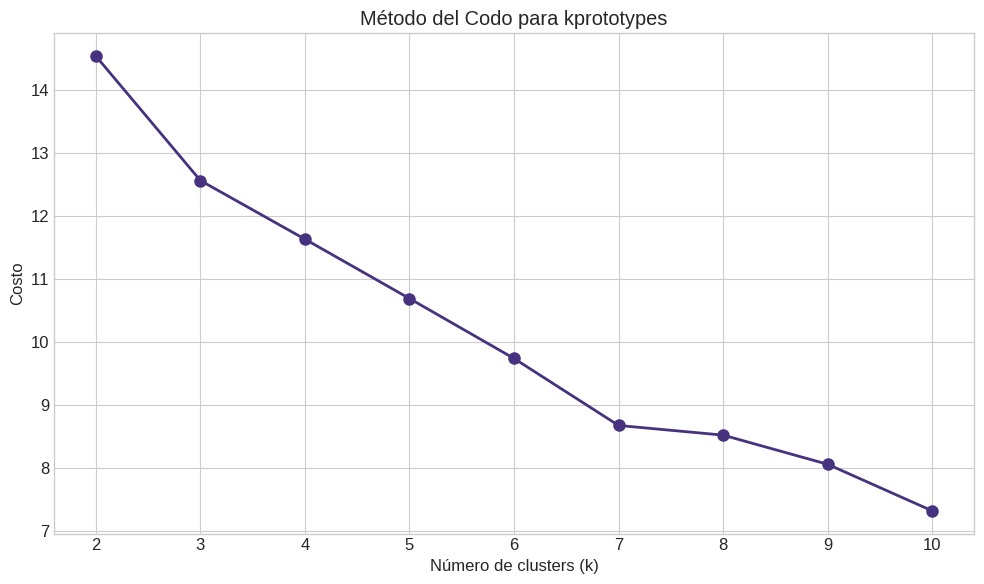


Métricas de evaluación:
Silhouette Score: 0.1212133142060173
Calinski-Harabasz Index: 16.59798177091955
Davies-Bouldin Index: 2.046623402515797

Distribución de registros por cluster:
cluster
0    34
1    31
2    35
Name: count, dtype: int64

Estadísticas por cluster:
            spending  credit_score    education  job_sector
cluster                                                    
0        1032.723319    582.264706     Bachelor  Technology
1        1238.175352    655.741935          PhD       Other
2         847.937226    725.542857  High School     Finance


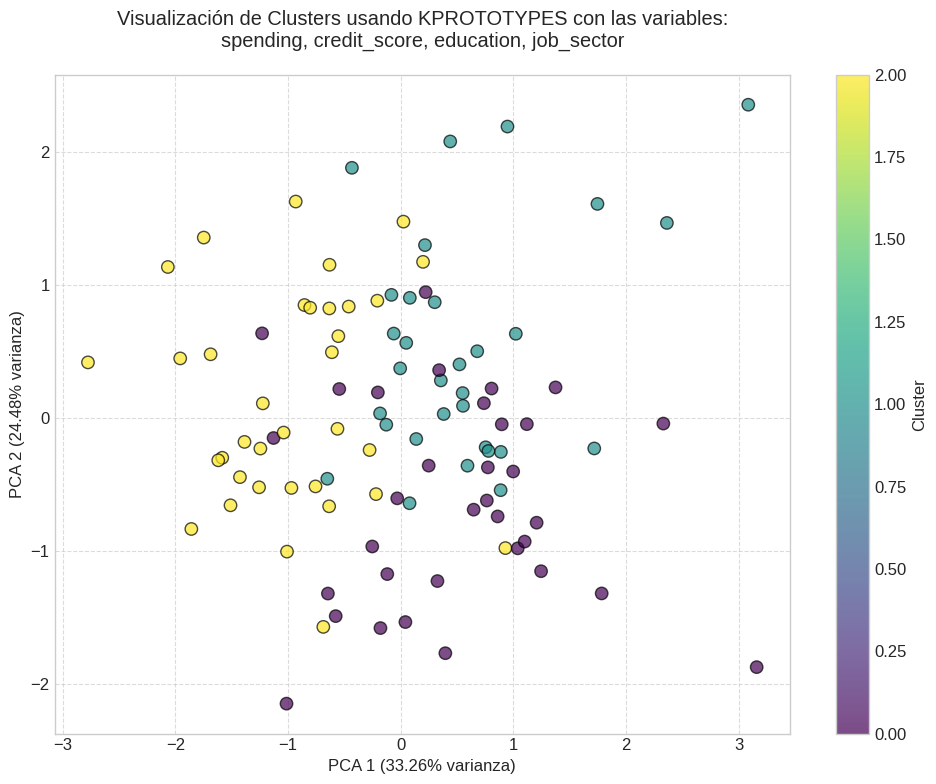

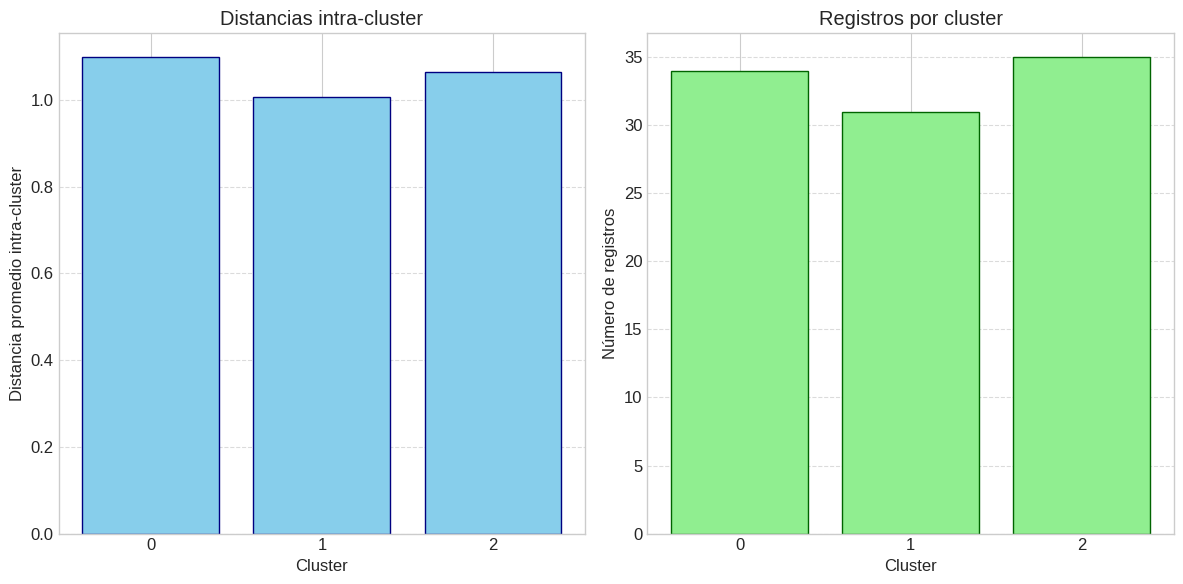

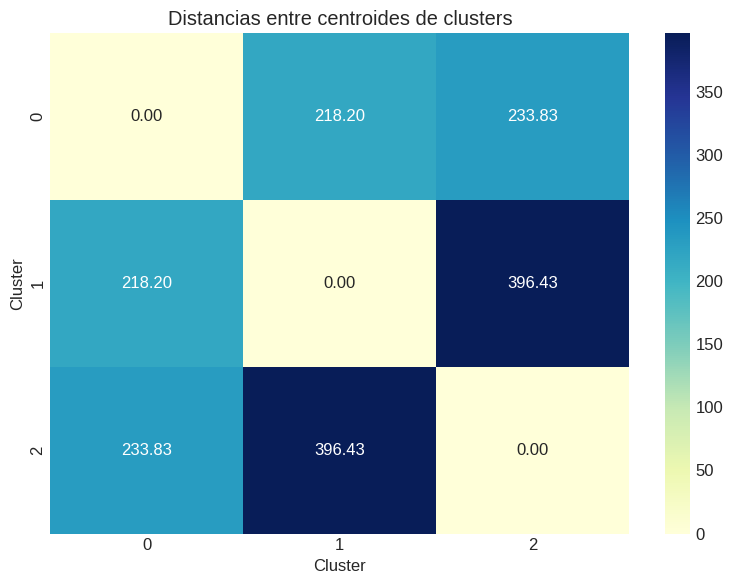


Se han utilizado todas las variables disponibles.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Función para generar dataset de ejemplo con 100 registros y 10 columnas
def generate_sample_dataset(n_samples=100):
    np.random.seed(42)

    # Generar variables numéricas continuas (4)
    income = np.random.normal(50000, 15000, n_samples)  # Ingresos
    age = np.random.randint(18, 80, n_samples)  # Edad
    spending = np.random.normal(1000, 300, n_samples)  # Gastos mensuales
    credit_score = np.random.normal(650, 100, n_samples).astype(int)  # Puntaje crediticio

    # Generar variables categóricas (4)
    education = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples)
    job_sector = np.random.choice(['Technology', 'Healthcare', 'Finance', 'Education', 'Other'], n_samples)
    marital_status = np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], n_samples)
    region = np.random.choice(['North', 'South', 'East', 'West'], n_samples)

    # Generar variables binarias (2)
    has_car = np.random.choice([0, 1], n_samples)
    owns_home = np.random.choice([0, 1], n_samples)

    # Crear el DataFrame
    df = pd.DataFrame({
        'income': income,
        'age': age,
        'spending': spending,
        'credit_score': credit_score,
        'education': education,
        'job_sector': job_sector,
        'marital_status': marital_status,
        'region': region,
        'has_car': has_car,
        'owns_home': owns_home
    })

    return df

# Función para determinar el tipo de variables
def get_variable_types(df, vars_list):
    num_vars = []
    cat_vars = []

    for var in vars_list:
        if pd.api.types.is_numeric_dtype(df[var]) and len(df[var].unique()) > 10:
            num_vars.append(var)
        else:
            cat_vars.append(var)

    return num_vars, cat_vars

# Función para determinar el algoritmo de clustering apropiado
def determine_clustering_algorithm(num_vars, cat_vars):
    if len(cat_vars) == 0:
        return 'kmeans'
    elif len(num_vars) == 0:
        return 'kmodes'
    else:
        return 'kprototypes'

# Función para encontrar el número óptimo de clusters (método del codo)
def find_optimal_k(df, vars_list, max_k=10):
    num_vars, cat_vars = get_variable_types(df, vars_list)
    algorithm = determine_clustering_algorithm(num_vars, cat_vars)

    inertia_values = []

    if algorithm == 'kmeans':
        # Preparar datos
        scaler = StandardScaler()
        data = scaler.fit_transform(df[vars_list])

        for k in range(2, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(data)
            inertia_values.append(kmeans.inertia_)

    elif algorithm == 'kmodes':
        for k in range(2, max_k + 1):
            kmode = KModes(n_clusters=k, init='Huang', random_state=42)
            clusters = kmode.fit_predict(df[vars_list])
            # Para KModes usamos el costo total como medida equivalente a la inercia
            inertia_values.append(kmode.cost_)

    else:  # kprototypes
        # Identificar índices de variables categóricas
        cat_indices = [vars_list.index(var) for var in cat_vars]

        # Normalizar variables numéricas
        all_data = df[vars_list].copy()
        if num_vars:
            scaler = MinMaxScaler()
            all_data[num_vars] = scaler.fit_transform(all_data[num_vars])

        for k in range(2, max_k + 1):
            kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
            clusters = kproto.fit_predict(all_data.values, categorical=cat_indices)
            inertia_values.append(kproto.cost_)

    return list(range(2, max_k + 1)), inertia_values

# Función para aplicar clustering y devolver las etiquetas
def apply_clustering(df, vars_list, n_clusters):
    num_vars, cat_vars = get_variable_types(df, vars_list)
    algorithm = determine_clustering_algorithm(num_vars, cat_vars)

    if algorithm == 'kmeans':
        # Preparar datos
        scaler = StandardScaler()
        data = scaler.fit_transform(df[vars_list])

        # Aplicar KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)

        # Para visualización PCA/transformación
        transformed_data = data
        model = kmeans

    elif algorithm == 'kmodes':
        # Aplicar KModes
        kmode = KModes(n_clusters=n_clusters, init='Huang', random_state=42)
        labels = kmode.fit_predict(df[vars_list])

        # Para visualización
        # Codificar variables categóricas para visualización
        encoder = OneHotEncoder(sparse_output=False)
        transformed_data = encoder.fit_transform(df[vars_list])
        model = kmode

    else:  # kprototypes
        # Identificar índices de variables categóricas
        cat_indices = [vars_list.index(var) for var in cat_vars]

        # Normalizar variables numéricas
        all_data = df[vars_list].copy()
        if num_vars:
            scaler = MinMaxScaler()
            all_data[num_vars] = scaler.fit_transform(all_data[num_vars])

        # Aplicar KPrototypes
        kproto = KPrototypes(n_clusters=n_clusters, init='Huang', random_state=42)
        labels = kproto.fit_predict(all_data.values, categorical=cat_indices)

        # Para visualización
        # Preparar datos transformados para visualización
        if cat_vars:
            encoder = OneHotEncoder(sparse_output=False)
            cat_encoded = encoder.fit_transform(df[cat_vars])

        if num_vars:
            scaler = StandardScaler()
            num_scaled = scaler.fit_transform(df[num_vars])

        if len(num_vars) > 0 and len(cat_vars) > 0:
            transformed_data = np.hstack((num_scaled, cat_encoded))
        elif len(num_vars) > 0:
            transformed_data = num_scaled
        else:
            transformed_data = cat_encoded

        model = kproto

    return labels, transformed_data, model, algorithm

# Función para calcular y visualizar métricas del clustering
def evaluate_clustering(df, vars_list, labels, transformed_data):
    try:
        silhouette = silhouette_score(transformed_data, labels)
    except:
        silhouette = "No aplicable"

    try:
        calinski = calinski_harabasz_score(transformed_data, labels)
    except:
        calinski = "No aplicable"

    try:
        davies = davies_bouldin_score(transformed_data, labels)
    except:
        davies = "No aplicable"

    # Calcular estadísticas de los clusters
    df_with_labels = df.copy()
    df_with_labels['cluster'] = labels

    # Cantidad de registros por cluster
    cluster_counts = df_with_labels['cluster'].value_counts().sort_index()

    # Estadísticas descriptivas por cluster
    # CORRECCIÓN: Separar el cálculo de estadísticas para variables numéricas y categóricas
    num_vars, cat_vars = get_variable_types(df, vars_list)

    # Para variables numéricas, podemos calcular la media
    if num_vars:
        cluster_stats_num = df_with_labels.groupby('cluster')[num_vars].mean()
    else:
        cluster_stats_num = pd.DataFrame()

    # Para variables categóricas, calculamos la moda (valor más frecuente)
    if cat_vars:
        cluster_stats_cat = pd.DataFrame()
        for cat in cat_vars:
            modes = df_with_labels.groupby('cluster')[cat].agg(
                lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
            )
            cluster_stats_cat[cat] = modes
    else:
        cluster_stats_cat = pd.DataFrame()

    # Combinar estadísticas de variables numéricas y categóricas
    if not cluster_stats_num.empty and not cluster_stats_cat.empty:
        cluster_stats = pd.concat([cluster_stats_num, cluster_stats_cat], axis=1)
    elif not cluster_stats_num.empty:
        cluster_stats = cluster_stats_num
    else:
        cluster_stats = cluster_stats_cat

    return {
        "silhouette": silhouette,
        "calinski_harabasz": calinski,
        "davies_bouldin": davies,
        "cluster_counts": cluster_counts,
        "cluster_stats": cluster_stats
    }

# Función para plotear gráfico de codo
def plot_elbow(k_values, inertia_values, algorithm):
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia_values, 'o-', linewidth=2, markersize=8)
    plt.grid(True)
    plt.xlabel('Número de clusters (k)')

    if algorithm == 'kmeans':
        plt.ylabel('Inercia')
        plt.title('Método del Codo para KMeans')
    else:
        plt.ylabel('Costo')
        plt.title(f'Método del Codo para {algorithm}')

    plt.xticks(k_values)
    plt.tight_layout()
    plt.show()

# Función para visualizar los clusters
def visualize_clusters(transformed_data, labels, vars_list, algorithm):
    # Utilizamos PCA para visualización si hay más de 2 dimensiones
    from sklearn.decomposition import PCA

    if transformed_data.shape[1] > 2:
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(transformed_data)
    else:
        reduced_data = transformed_data

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis',
                         edgecolor='k', s=80, alpha=0.7)

    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title(f'Visualización de Clusters usando {algorithm.upper()} con las variables:\n{", ".join(vars_list)}', pad=20)

    if transformed_data.shape[1] > 2:
        plt.xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
        plt.ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
    else:
        plt.xlabel(vars_list[0])
        plt.ylabel(vars_list[1])

    plt.tight_layout()
    plt.show()

# Función para visualizar la distancia intra-cluster y entre clusters
def visualize_cluster_distances(df, vars_list, labels, algorithm):
    from scipy.spatial.distance import pdist, squareform

    # Crear dataframe con etiquetas
    df_labeled = df.copy()
    df_labeled['cluster'] = labels

    # Obtener el número de clusters
    n_clusters = len(np.unique(labels))

    # Preparar los datos según el algoritmo
    num_vars, cat_vars = get_variable_types(df, vars_list)

    # Función para calcular la matriz de distancias según el tipo de datos
    def calculate_distance_matrix(data, is_categorical=False):
        if is_categorical:
            # Para datos categóricos, usamos distancia de hamming
            dist_matrix = np.zeros((len(data), len(data)))
            for i in range(len(data)):
                for j in range(i+1, len(data)):
                    # Distancia: proporción de atributos que difieren
                    dist_matrix[i, j] = np.sum(data.iloc[i] != data.iloc[j]) / len(data.columns)
                    dist_matrix[j, i] = dist_matrix[i, j]
            return dist_matrix
        else:
            # Para datos numéricos, usamos distancia euclidiana
            scaler = StandardScaler()
            scaled_data = scaler.fit_transform(data)
            return squareform(pdist(scaled_data, 'euclidean'))

    # Calcular distancias
    if algorithm == 'kmeans':
        dist_matrix = calculate_distance_matrix(df[num_vars])
    elif algorithm == 'kmodes':
        dist_matrix = calculate_distance_matrix(df[cat_vars], is_categorical=True)
    else:  # kprototypes
        # Combinamos distancias numéricas y categóricas (promedio ponderado)
        if num_vars and cat_vars:
            num_dist = calculate_distance_matrix(df[num_vars])
            cat_dist = calculate_distance_matrix(df[cat_vars], is_categorical=True)
            # Ponderamos por el número de variables de cada tipo
            w_num = len(num_vars) / len(vars_list)
            w_cat = len(cat_vars) / len(vars_list)
            dist_matrix = w_num * num_dist + w_cat * cat_dist
        elif num_vars:
            dist_matrix = calculate_distance_matrix(df[num_vars])
        else:
            dist_matrix = calculate_distance_matrix(df[cat_vars], is_categorical=True)

    # Calcular distancias intra-cluster y entre clusters
    intra_cluster_distances = []
    cluster_centers = []

    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]

        # Calcular distancia intra-cluster promedio
        if len(cluster_indices) > 1:
            intra_distances = []
            for idx1 in range(len(cluster_indices)):
                for idx2 in range(idx1 + 1, len(cluster_indices)):
                    i1, i2 = cluster_indices[idx1], cluster_indices[idx2]
                    intra_distances.append(dist_matrix[i1, i2])

            intra_cluster_distances.append(np.mean(intra_distances))
        else:
            intra_cluster_distances.append(0)  # Solo un punto en el cluster

        # Calcular centro del cluster (promedio de puntos)
        if algorithm == 'kmeans' or (algorithm == 'kprototypes' and num_vars):
            cluster_data = df_labeled[df_labeled['cluster'] == i][num_vars]
            cluster_center = cluster_data.mean().values
            cluster_centers.append(cluster_center)

    # Calcular distancias entre clusters si tenemos datos numéricos
    inter_cluster_distances = []

    if algorithm == 'kmeans' or (algorithm == 'kprototypes' and num_vars):
        for i in range(n_clusters):
            for j in range(i + 1, n_clusters):
                dist = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
                inter_cluster_distances.append((i, j, dist))

    # Visualizar distancias intra-cluster
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(n_clusters), intra_cluster_distances, color='skyblue', edgecolor='navy')
    plt.xlabel('Cluster')
    plt.ylabel('Distancia promedio intra-cluster')
    plt.title('Distancias intra-cluster')
    plt.xticks(range(n_clusters))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Visualizar número de registros por cluster
    plt.subplot(1, 2, 2)
    counts = df_labeled['cluster'].value_counts().sort_index()
    plt.bar(range(n_clusters), counts, color='lightgreen', edgecolor='darkgreen')
    plt.xlabel('Cluster')
    plt.ylabel('Número de registros')
    plt.title('Registros por cluster')
    plt.xticks(range(n_clusters))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Visualizar matriz de distancia entre clusters si tenemos distancias inter-cluster
    if inter_cluster_distances:
        plt.figure(figsize=(8, 6))
        dist_matrix_between = np.zeros((n_clusters, n_clusters))

        for i, j, dist in inter_cluster_distances:
            dist_matrix_between[i, j] = dist
            dist_matrix_between[j, i] = dist

        sns.heatmap(dist_matrix_between, annot=True, cmap='YlGnBu', fmt='.2f')
        plt.title('Distancias entre centroides de clusters')
        plt.xlabel('Cluster')
        plt.ylabel('Cluster')
        plt.tight_layout()
        plt.show()
    else:
        print("No se pudieron calcular distancias entre clusters para este tipo de datos.")

# Función principal para ejecutar el análisis de clustering
def run_clustering_analysis(df, n_clusters=3):
    # Obtenemos todas las variables del dataframe
    all_variables = df.columns.tolist()

    # Inicializamos con las primeras 4 variables
    selected_vars = all_variables[:4]

    # Ejecutamos el bucle hasta que no haya más variables nuevas para seleccionar
    iteration = 1

    while True:
        print(f"\n{'='*80}")
        print(f"ITERACIÓN {iteration}: Variables seleccionadas: {selected_vars}")
        print(f"{'='*80}")

        # Determinamos el tipo de variables y el algoritmo adecuado
        num_vars, cat_vars = get_variable_types(df, selected_vars)
        algorithm = determine_clustering_algorithm(num_vars, cat_vars)
        print(f"Tipos de variables: {len(num_vars)} numéricas, {len(cat_vars)} categóricas")
        print(f"Algoritmo seleccionado: {algorithm.upper()}")

        # Encontramos el número óptimo de clusters (método del codo)
        k_values, inertia_values = find_optimal_k(df, selected_vars)

        # Visualizamos el gráfico del codo
        plot_elbow(k_values, inertia_values, algorithm)

        # Aplicamos clustering con el número especificado de clusters
        labels, transformed_data, model, algorithm = apply_clustering(df, selected_vars, n_clusters)

        # Evaluamos y visualizamos los resultados
        metrics = evaluate_clustering(df, selected_vars, labels, transformed_data)

        # Imprimimos las métricas
        print("\nMétricas de evaluación:")
        print(f"Silhouette Score: {metrics['silhouette']}")
        print(f"Calinski-Harabasz Index: {metrics['calinski_harabasz']}")
        print(f"Davies-Bouldin Index: {metrics['davies_bouldin']}")

        print("\nDistribución de registros por cluster:")
        print(metrics['cluster_counts'])

        print("\nEstadísticas por cluster:")
        print(metrics['cluster_stats'])

        # Visualizamos los clusters
        visualize_clusters(transformed_data, labels, selected_vars, algorithm)

        # Visualizamos las distancias intra-cluster y entre clusters
        visualize_cluster_distances(df, selected_vars, labels, algorithm)

        # Preparamos las variables para la siguiente iteración
        # Mantenemos 2 variables de la iteración actual
        kept_vars = selected_vars[-2:]

        # Buscamos las próximas 2 variables que no se hayan utilizado
        remaining_vars = [var for var in all_variables if var not in selected_vars]

        # Si no hay suficientes variables nuevas, terminamos
        if len(remaining_vars) < 2:
            print("\nNo hay suficientes variables nuevas para continuar.")
            break

        # Seleccionamos 2 nuevas variables
        new_vars = remaining_vars[:2]

        # Actualizamos las variables seleccionadas para la siguiente iteración
        selected_vars = kept_vars + new_vars

        iteration += 1

        # Opción para detener después de cierto número de iteraciones
        if iteration > len(all_variables) // 2:
            print("\nSe han utilizado todas las variables disponibles.")
            break

# Crear el dataset de ejemplo
df = generate_sample_dataset(100)

# Mostrar las primeras filas del dataset
print("Dataset de ejemplo generado:")
print(df.head())

# Ejecutar análisis de clustering
run_clustering_analysis(df, n_clusters=3)